<h1><center>DS 300 Data Mining - Take-home Quiz 2</center></h1>

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">Dataset Description</p>

```
The dataset is about weather humidity prediction. This data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured. 

The task of this lab is to use 9am sensor signals as features to predict humidity level (high or low) at 3pm. Among all columns you may find many have the suffix of "9am". That indicates the feature was capature at 9 am on that day. There is one column by the end that has the suffix of "3pm". That is the dependent variable (y label) that we need to predict. 
```

## Question 1

#### Import all necessary libraries

In [67]:
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

#### Create SQLite engine and read the 'data' Table into a variable named as 'table'.
#### Data can be found at [link](https://github.com/BlueJayADAL/DS300/blob/master/datasets/humidity.db), and you should upload it to the same directory of this notebook.

In [68]:
# Need to place the database file in the same directory of the notebook
engine = db.create_engine('sqlite:///humidity.db')
connection = engine.connect()
metadata = db.MetaData()
table = db.Table('data', metadata, autoload = True, autoload_with = engine)

In [69]:
# Check all the columns in the table
table.columns.keys()



['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

## Question 2
#### With all the keys observed in Question 1, use a query to read all Table data except the first column `number`  into an array, then use the arrary to create a DataFrame named 'df'.

In [70]:
selected_cols_str = ', '.join(table.columns.keys()[1:])
selected_cols_str = "SELECT " + selected_cols_str + " FROM data"
selected_cols_str

'SELECT air_pressure_9am, air_temp_9am, avg_wind_direction_9am, avg_wind_speed_9am, max_wind_direction_9am, max_wind_speed_9am, rain_accumulation_9am, rain_duration_9am, relative_humidity_9am, relative_humidity_3pm FROM data'

In [71]:
## Query the all columns except "number" column from the table
ResultProxy = connection.execute(selected_cols_str)
ResultSet = ResultProxy.fetchall()

In [72]:
# Generate a DataFrame using the queried data
df = pd.DataFrame(data=ResultSet, columns=ResultSet[0].keys())

In [73]:
# Show the first 5 rows of the DataFrame
df.head()



,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


## Question 3
#### Show the properties of all columns.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10)
memory usage: 85.7 KB


#### Show the basic statistics of the DataFrame.

In [75]:
df.describe()



,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


#### Show the total number of missing values in each column.

In [76]:
df.isna().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

## Question 4

#### Impute the missing values from each column with the `mode` constant of that column. 

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
# Given the following columns that have missing data
null_cols = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am', 'avg_wind_speed_9am', 
             'max_wind_direction_9am', 'max_wind_speed_9am', 'rain_accumulation_9am', 'rain_duration_9am']


# Fix the missing data

for col in null_cols:
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    newCol = imp.fit_transform(df[col].values.reshape(-1,1))
    df[col] = newCol




In [79]:
# Double check if our imputation works
df.isna().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

## Question 5

#### Convert the dependent variable `relative_humidity_3pm` into binary form for easier classification. 
#### If we consider `relative_humidity_3pm` >= 25 as "high humidity" which is denoted as `1`, otherwise as "low humidity" which is denoated as `0`. Create a new column for the dependent variable named as `high_humidity` with binary values and remove the old `relative_humidity_3pm` column from the DataFrame.

Hint: python support automatic type conversion. E.g. `True * 1 = 1`; `False * 1 = 0`

In [80]:
# Generate the new column
hh_col = (df['relative_humidity_3pm']>= 25) == 1
df['high_humidity'] = hh_col
df['high_humidity'] = df['high_humidity'] * 1

# See the result
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [81]:
# Remove the old column
df.drop('relative_humidity_3pm', axis=1, inplace=True)


# See the result
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [82]:
# Show the last two columns from the DataFrame to verify if it works
df.iloc[:, -2:].head()



,relative_humidity_9am,high_humidity
0,42.420000,1
1,24.328697,0
2,8.900000,0
3,12.189102,0
4,92.410000,1


## Question 6

#### Feature correlation analysis. Show the scatter plot of feature pairs as below to find potential highly correlated features.

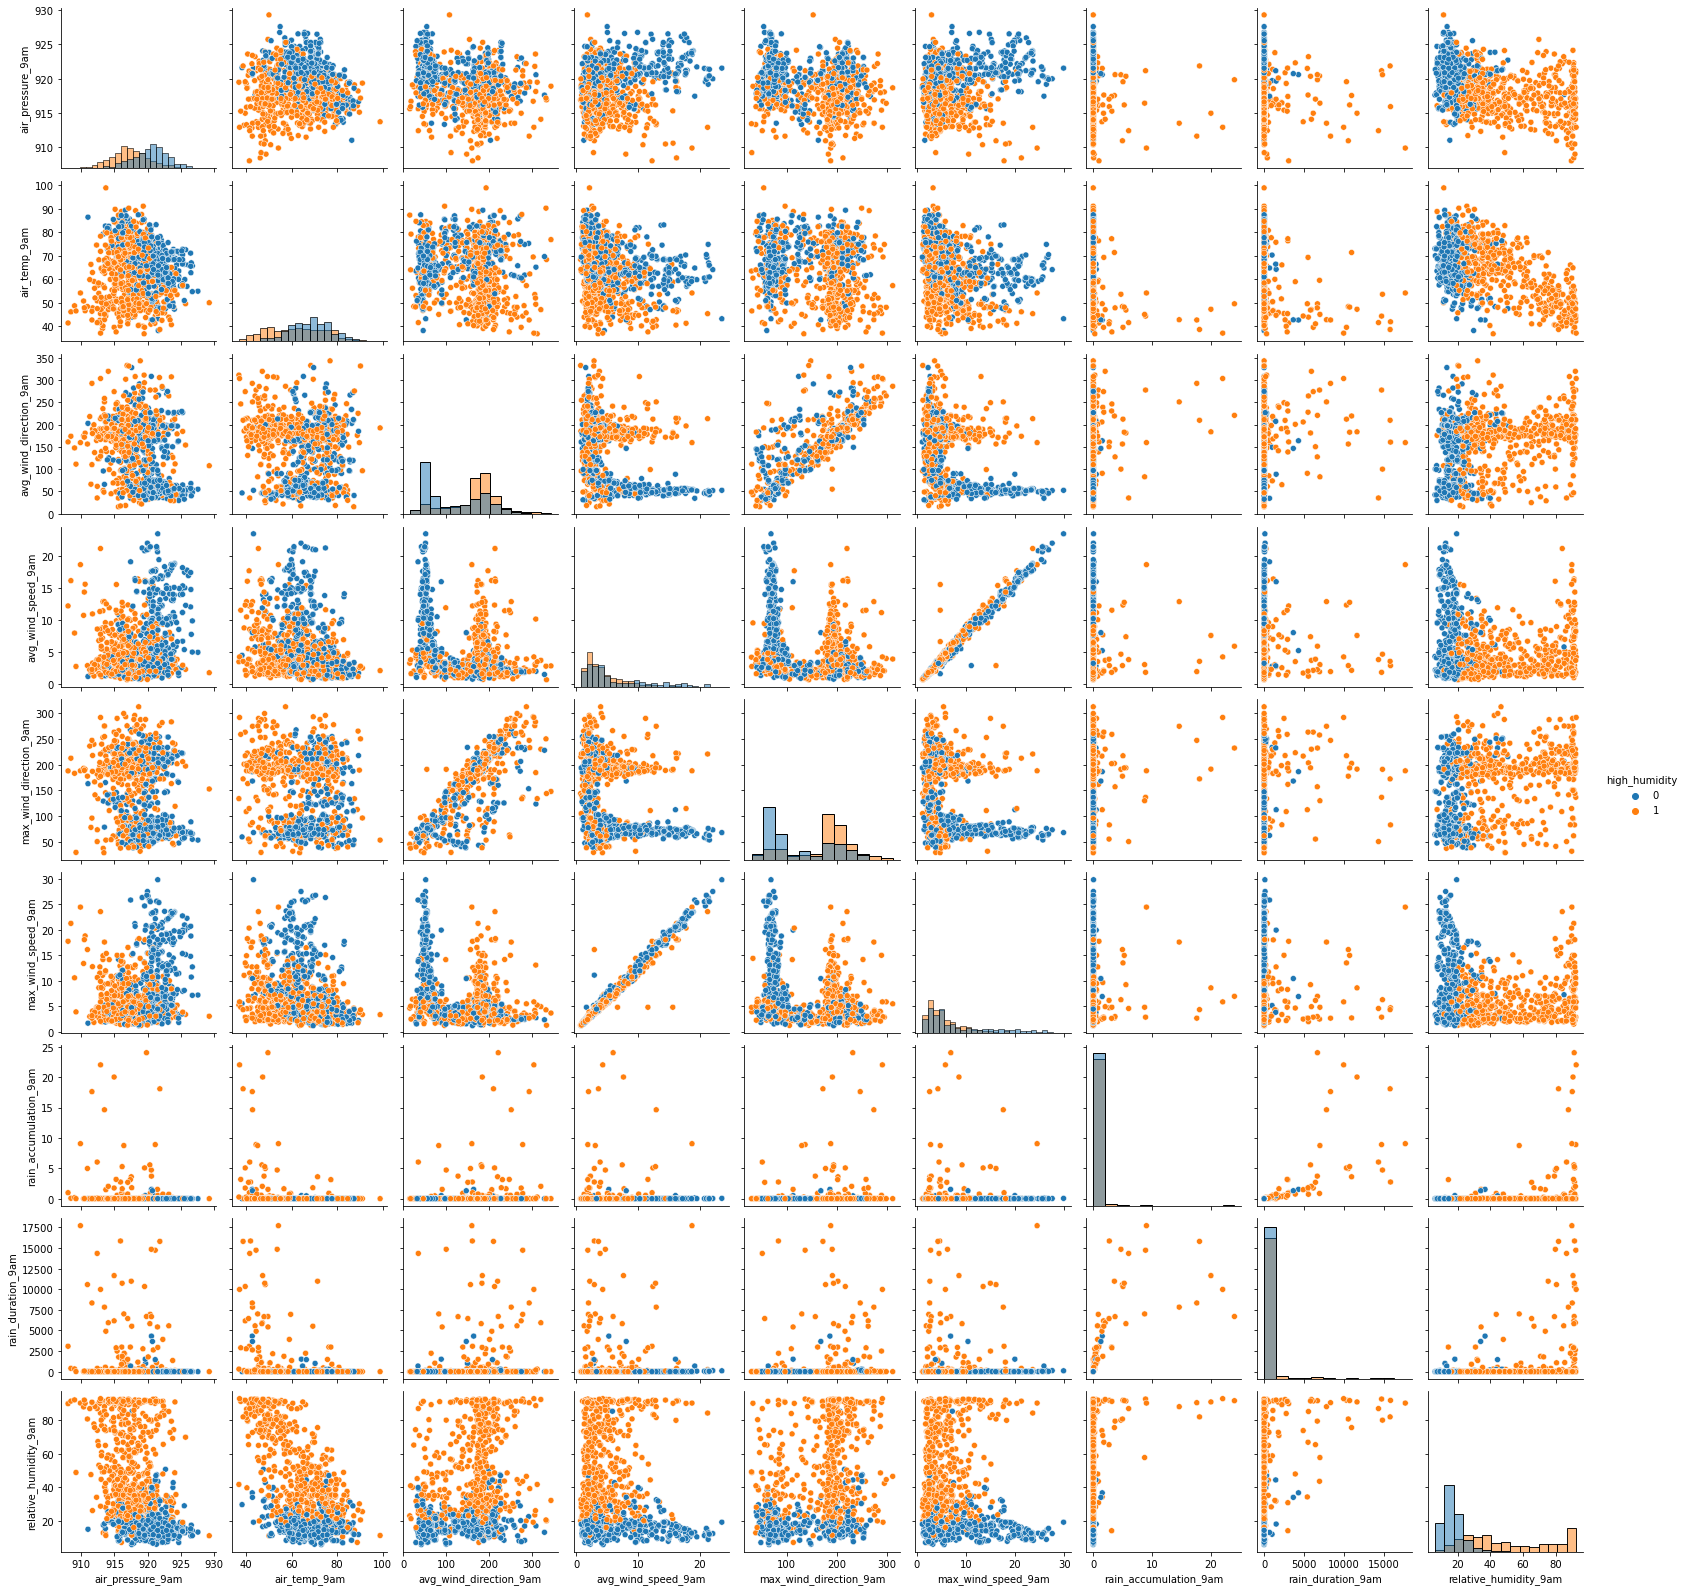

In [83]:
sns.pairplot(df, hue='high_humidity', diag_kind='hist')



#### We can find two almost linear lines fromt the plot above. Use correlation analysis to find the exact numbers for the two features.

In [84]:
df[['avg_wind_speed_9am', 'max_wind_speed_9am']].corr()



,avg_wind_speed_9am,max_wind_speed_9am
avg_wind_speed_9am,1.000000,0.987555
max_wind_speed_9am,0.987555,1.000000


## Question 7

#### Create X vector with all columns excluding `max_wind_speed_9am` and `high_humidity`. Create y vector with the dependent variable. 

In [85]:
X = df.drop(['max_wind_speed_9am', 'high_humidity'], axis=1)


y = df['high_humidity']



In [86]:
# Check the columns of X vector, the output should be "False False"
print('max_wind_speed_9am' in X.columns, 'high_humidity' in X.columns)

False False


#### Split X, y vectors into training set and testing test. Use training = 80%, and random seed = 101

In [87]:
# Import function
from sklearn.model_selection import train_test_split

In [88]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [89]:
X_train.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
306,913.970000,72.824000,219.700000,1.498750,125.900000,0.0,0.0,25.920000
749,919.170000,79.988000,167.000000,5.077854,183.700000,0.0,0.0,22.240000
48,920.230000,67.316000,153.200000,1.230317,136.900000,0.0,0.0,13.890000
347,920.181295,58.908109,57.900885,9.395121,75.724336,0.0,0.0,18.933142
836,924.110000,55.184000,212.300000,3.668582,226.600000,0.0,0.0,48.680000


In [90]:
y_train.head()

306    0
749    1
48     0
347    0
836    1
Name: high_humidity, dtype: int32

## Question 8

#### Use Gaussian Naive Bayes Classifier to fit the training dataset, and show the classification report.

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [92]:
clf = GaussianNB()
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.97      0.84       114
           1       0.96      0.62      0.75       105

    accuracy                           0.80       219
   macro avg       0.85      0.80      0.79       219
weighted avg       0.84      0.80      0.80       219



## Question 9

#### Use Decision Tree Classifier to fit the training dataset, and show the classification report. Use the default setting for all parameters.

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train.values, y_train.values)
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred2))





              precision    recall  f1-score   support

           0       0.91      0.91      0.91       114
           1       0.90      0.90      0.90       105

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## Question 10

#### To see whether we can do even better with Decision Tree Classifier, let's study a list of `max_depth` parameters and use elbow method to find the optimal depth of the tree. In elbow method, use `accuracy_score` as the criteria to find the optimal point.

In [95]:
# The list of max_depth parameters are given as below
depth_list = np.arange(2, 15, 1)

In [96]:
from sklearn.metrics import accuracy_score

accuracy = [] # list of accuracy

# Finish the for loop below
for depth in depth_list:
    val = DecisionTreeClassifier(max_depth=depth).fit(X_train.values, y_train.values).predict(X_test)
    accuracy.append(accuracy_score(y_test, val))




C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier 

In [97]:
# Show the list of accuracy from 13 models
accuracy

[0.8584474885844748,
 0.8858447488584474,
 0.8995433789954338,
 0.8949771689497716,
 0.9041095890410958,
 0.9178082191780822,
 0.9041095890410958,
 0.9041095890410958,
 0.8995433789954338,
 0.8995433789954338,
 0.8995433789954338,
 0.908675799086758,
 0.9041095890410958]

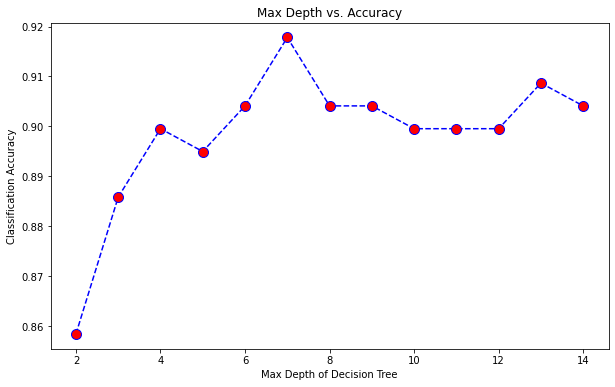

In [98]:
# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(depth_list, accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Classification Accuracy')
plt.title('Max Depth vs. Accuracy')
plt.show()






#### Re-train the model with the optimal depth and print the classification report.

In [99]:
# Create decision tree classifier object
clf3 = DecisionTreeClassifier(max_depth=7)

# Train the classifier
clf3 = clf3.fit(X_train.values,y_train.values)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test.values)

# Print the classification report
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       114
           1       0.93      0.88      0.90       105

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



## Great job!